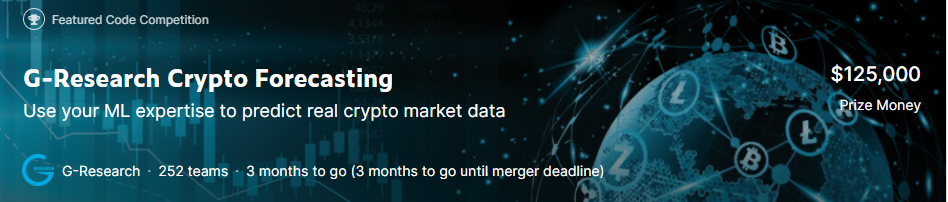

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

February 1, 2022 - Final submission deadline.

May 3, 2022 - Competition End Date - Winner's announcement


It's a future prediction competition where you can see the results in May by submitting in February.<br>


Optiver Realized Volatility Prediction is the same in terms of future prediction competition. Although it was provisionally 90th, it is now 1415th.

### <u> <font color = "red"> Note: Public data is very big. </font> </u> <br>
If you don't keep it simple, it will take more than 9 hours even if you use GPU. <br>
Even with a model that uses local data and finishes in about 30 minutes, submitting it often exceeds 9 hours, which is a pain. <br>
I tried a simple neural network, but it didn't finish in 9 hours. Gradient boosting is finally over. <br>

2021/11/16 I found some things when I looked it up.<br>
-It takes 8 minutes to output by simply setting Target = 0.<br>
-The data length is not always 14.<br>
-It took more than 9 hours when I put an interval of 1 second in the loop.<br>
→ 3600 seconds x 9 hours -8 minutes x 60 seconds =There are more than 28320 loops.<br>

test notebook<br>
https://www.kaggle.com/tensorchoko/g-research-test

### Added MACD and RSI,Trendline,ROCP. I think it's important.

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Tab-lib install</span>

There was a technical analysis tool called Tab-lib. I will install it.

In [ ]:
!cp ../input/talibinstall/ta-lib-0.4.0-src.tar.gzh  ./ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz > null
!cd ta-lib && ./configure --prefix=/usr > null && make  > null && make install > null

In [ ]:
!cp ../input/talibinstall/TA-Lib-0.4.21.tar.gzh TA-Lib-0.4.21.tar.gz
!pip install TA-Lib-0.4.21.tar.gz
!pip install ../input/talibinstall/numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
import talib as ta

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Asset_details.csv</span>

Provides the actual name of each Asset_ID and the name of the crypto asset, and the weight that each crypto asset receives in the metric

In [ ]:
asset_details = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv')
asset_details

In [ ]:
asset_details.Weight.sum()

The weight of each asset used to weigh their relative importance in the evaluation metric.Well, how should we use this?

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Train.csv</span>

In [ ]:
crypto_df = pd.read_csv('../input/g-research-crypto-forecasting/train.csv')
crypto_df


https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition<br>

A model of linear regression is described.

I have to read this notebook well.

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">supplemental_train.csv</span>

In [ ]:
supplemental_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv')
supplemental_train

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">example_test.csv</span>

Use this as test data

In [ ]:
example_test = pd.read_csv('../input/g-research-crypto-forecasting/example_test.csv')
example_test.head()

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">example_sample_submission</span>

In [ ]:
sample_submission = pd.read_csv('../input/g-research-crypto-forecasting/example_sample_submission.csv')
sample_submission.head()

Looking at the public code, there is score = 0.999. Since leak data is used, the code doesn't mean anything at all.
 
  Well, it's a future prediction competition, so I don't think the score is meaningful.
 
  Anyway, it's hard to finish within 9 hours after submitting.
 

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Check BTC</span>

In [ ]:
btc =crypto_df[crypto_df.Asset_ID==1].reset_index(drop=True) 
btc

Since the timestamp is difficult to understand, I added date and time columns

In [ ]:
btc['date'] = btc.timestamp.astype('datetime64[s]')
btc['date'] = btc['date'].astype(str)
btc['time'] = btc['date'].apply(lambda x: x[11:])
btc

# HEATMAP

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(btc[['Count','Open','High','Low','Close','Volume','VWAP','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()


'Volume

### np.log1p

In [ ]:
btc['np_count'] = np.log1p(btc['Count'])
btc['np_open'] = np.log1p(btc['Open'])
btc['np_high'] = np.log1p(btc['High'])
btc['np_low'] = np.log1p(btc['Low'])
btc['np_close'] = np.log1p(btc['Close'])
btc['np_volume'] = np.log1p(btc['Volume'])
btc['np_vwap'] = np.log1p(btc['VWAP'])

plt.figure(figsize=(10,8))
sns.heatmap(btc[['np_count','np_open','np_high','np_low','np_close','np_volume','np_vwap','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

 np.log1p(btc['Volume'])

### **2

In [ ]:
btc['np_count'] =  (btc['Count'])**2
btc['np_open'] = (btc['Open'])**2
btc['np_high'] = (btc['High'])**2
btc['np_low'] = (btc['Low'])**2
btc['np_close'] = (btc['Close'])**2
btc['np_volume'] = (btc['Volume'])**2
btc['np_vwap'] = (btc['VWAP'])**2

plt.figure(figsize=(10,8))
sns.heatmap(btc[['np_count','np_open','np_high','np_low','np_close','np_volume','np_vwap','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

### np.sqrt

In [ ]:
btc['np_count'] =  np.sqrt(btc['Count'])
btc['np_open'] = np.sqrt(btc['Open'])
btc['np_high'] = np.sqrt(btc['High'])
btc['np_low'] = np.sqrt(btc['Low'])
btc['np_close'] = np.sqrt(btc['Close'])
btc['np_volume'] = np.sqrt(btc['Volume'])
btc['np_vwap'] = np.sqrt(btc['VWAP'])

plt.figure(figsize=(10,8))
sns.heatmap(btc[['np_count','np_open','np_high','np_low','np_close','np_volume','np_vwap','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

np.sqrt(btc['Volume'])

### - /

In [ ]:
btc['np_count'] = btc['Count'] -btc['Volume']
btc['np_open'] = btc['Open'] -  btc['Close'] 
btc['np_high'] = btc['High'] - btc['Low']
btc['np/count'] = btc['Count'] /btc['Volume']
btc['np/open'] = btc['Open'] /  btc['Close'] 
btc['np/high'] = btc['High'] / btc['Low']

plt.figure(figsize=(10,8))
sns.heatmap(btc[['np_count','np_open','np_high','np/count','np/open','np/high','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

### + *

In [ ]:
btc['np_count'] = btc['Count'] +btc['Volume']
btc['np_open'] = btc['Open'] +  btc['Close'] 
btc['np_high'] = btc['High'] + btc['Low']
btc['np/count'] = btc['Count'] *btc['Volume']
btc['np/open'] = btc['Open'] *  btc['Close'] 
btc['np/high'] = btc['High'] * btc['Low']

plt.figure(figsize=(10,8))
sns.heatmap(btc[['np_count','np_open','np_high','np/count','np/open','np/high','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

### test

In [ ]:
btc['np_open'] =btc[f'Open'] / ((np.log(np.abs(btc[f'Open'])) **10)+(np.log(np.abs(btc[f'Close']))**10))
btc['np_close']=   btc[f'Close'] /((np.log(np.abs(btc[f'Open'])) **10)+(np.log(np.abs(btc[f'Close']))**10))
btc['np_high']= btc[f'High'] / ((np.log(np.abs(btc[f'High']))**10)+(np.log(np.abs(btc[f'Low']))**10))
btc['np_low'] = btc[f'Low'] / ((np.log(np.abs(btc[f'High']))**10)+(np.log(np.abs(btc[f'Low']))**10))
plt.figure(figsize=(10,8))
sns.heatmap(btc[['np_open','np_close','np_high','np_low','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Check All Coins</span>

# Target

15 minute residualized returns

I would expect this. Looking at the HEATMAP, there seems to be no item that has an important relationship.

Also, it seems necessary to create an objective function.

I'm sure there will be an important paper somewhere again.

It returns independently of the benchmark. Residual returns are the relative returns multiplied by the beta and benchmark returns. To be precise, the residual return on an asset is equal to the excess return minus the beta multiplied by the benchmark excess return.

https://www.nasdaq.com/glossary/r/residual-return

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    a = str(x-1) +' ' + asset_details[asset_details.Asset_ID==i].Asset_Name.values 
    plt.title(a,fontsize=18)
    plt.plot(money.index,money.Target)
    x +=1
del money


・ Waveforms of 0 and 5 are very similar <br>
・ Waveforms of 1 and 7 are similar <br>
・ Waveforms of 3,8,12,13 are a little similar <br>
・ Waveforms of 2, 9 and 10 are a little similar <br>
・ There are not many similarities between 6 and 11 <br>

Really?

# All

In [ ]:
fig = plt.figure(figsize=(30,20))
data =crypto_df #[-10000:]
for i in data.Asset_ID.unique():
    money = data[data.Asset_ID==i].reset_index(drop=True) 
    plt.plot(money.index,money.Target)
del data

# [-10000]

In [ ]:
fig = plt.figure(figsize=(30,20))
data =crypto_df[-10000:]
for i in data.Asset_ID.unique():
    money = data[data.Asset_ID==i].reset_index(drop=True) 
    plt.plot(money.index,money.Target)
del data

# [-1000]

In [ ]:
fig = plt.figure(figsize=(30,20))
data =crypto_df[-1000:]
for i in data.Asset_ID.unique():
    money = data[data.Asset_ID==i].reset_index(drop=True) 
    plt.plot(money.index,money.Target)


In [ ]:
check = pd.DataFrame()
for i in data.Asset_ID.unique():
    check[i] = data[data.Asset_ID==i]['Target'].reset_index(drop=True) 

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">HeatMap Coins</span>

### Some coins have a strong correlation.

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(check.dropna().corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()
del check



### It may be good to create a model that summarizes the ones with strong correlation.

In [ ]:
for i in  crypto_df.Asset_ID.unique():
    check = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    print('Asset_ID=', pd.to_datetime(check.loc[0,'timestamp'],unit="s",infer_datetime_format=True))
   

In [ ]:
check

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Check feature importance</span>

In [ ]:
from lightgbm import LGBMRegressor
df = crypto_df.copy()
df['macd'], df['macdsignal'], df['MACD_HIST'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df["RSI"]=ta.RSI(df['Close'], timeperiod=14)
df['ema']   =ta.EMA(df['Open'], timeperiod=20)
df['willr'] = ta.WILLR(df['High'], df['Low'],np.array(df.loc[:, 'Close']), timeperiod=14)
df['ROCP'] =ta.ROCP(df['Open'])
df['momentam'] =ta.MOM(df['Open'])
df['APO'] =ta.APO(df['Open'])
df['PPO'] =ta.PPO(df['Open'])
df['CMO'] =ta.CMO(df['Open'])
df['MIDPOINT'] =ta.MIDPOINT(df['Open'])
df['TRENDLINE'] =ta.HT_TRENDLINE(df['Open'])

df = df[df["Asset_ID"] == 0]

df = df.dropna(subset=['Target'])
y = df['Target']
df = df.fillna(-1)
    
df = df.drop(['Asset_ID','Target'],axis=1)
X  = df 

model = LGBMRegressor(n_estimators=1500,num_leaves=700,learning_rate=0.09,silent=True)
model.fit(X, y)

fi =model.feature_importances_
fi_df = pd.DataFrame({'feature': list(X.columns),
         'feature importance': fi[:]}).sort_values('feature importance', ascending = False)
display(fi_df)
del df
del X
del y

# Open/Close

The tendency is different for each coin. It seems that the result will be better if the model is divided for each coin.

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    plt.plot(money.index,money.Open,color="red")
    plt.plot(money.index,money.Close,color="blue")
    x +=1

# High/Low

Depending on the coin, there are great ups and downs.

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    plt.plot(money.index,money.High,color="red")
    plt.plot(money.index,money.Low,color="blue")
    x +=1
del money

# Volume



There are also maniac coins.

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    plt.plot(money.index,money.Volume)
    x +=1
del money

# VWAP

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    plt.plot(money.index,money.VWAP)
    x +=1
    
del money

# Count


The transaction volume is increasing. Are you all doing it?

There is a gap between Count and Volume.

The number of transactions is increasing unilaterally, but the transaction volume peaks around the center of the graph.

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    plt.plot(money.index,money.Count)
    x +=1
del money


Then, what is the relationship between OPEN-CLOSE, HIGH-LOW and target?

In [ ]:
btc['high_low'] = btc['High'] - btc['Low']
btc['open_close'] = btc['Open'] - btc['Close']


The world is not so sweet

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(btc[['Count','Open','High','Low','Close','Volume','high_low','open_close','VWAP','Target']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

# MACD

In [ ]:
    
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    money['MACD'] ,_,_ = ta.MACD(money['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    plt.plot(money.index,money.MACD)
    x +=1

# RSI

In [ ]:
   
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    money["RSI"]=ta.RSI(money['Close'], timeperiod=14)
    plt.plot(money.index,money.RSI)
    x +=1

# TRENDLINE

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    money["TRENDLINE"]=ta.HT_TRENDLINE(money['Close'])
    plt.plot(money.index,money.TRENDLINE)
    x +=1

# ROCP

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in crypto_df.Asset_ID.unique():
    money = crypto_df[crypto_df.Asset_ID==i].reset_index(drop=True) 
    fig.add_subplot(4, 4, x)
    plt.title(asset_details[asset_details.Asset_ID==i].Asset_Name.values,fontsize=18)
    money["ROCP"]=ta.ROCP(money['Close'])
    plt.plot(money.index,money.ROCP)
    x +=1

# Disscution



I don't think any additional data will help in this forecast competition. I'm usually against external data, but finding the signal somewhere is worth it, so it makes perfect sense here. Also, it doesn't make much sense to have no latest version of the data itself <by Psi>

https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284942<br>
https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285726<br>

### Forecasting Competitions<br>
https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284856<br>
https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284883

It has a total of 14 assets and 7 basic functions (close, open, etc.). A simple idea in "brute force" is to first pivot the data for each timestamp to create 14 * 7 = 98 features and 14 targets, then a sliding window with a multitasking RNN / Transformers / TCN. Applying training. Look at such a method.

https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285176


I noticed that different exchanges have different OHLC (Open High Low Close) data. This is because the transaction fees are different. Are you wondering if competition organizers can share insights into the process of creating datasets?

https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285713

。<br>
This is a time-series competition.
moreover - this can be modeled with hierarchical time series (HTS) model.

https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284903

# Liner Regression


In [ ]:
# create dataframe with returns for all assets
import time
from datetime import datetime
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

all_assets_2021 = pd.DataFrame([])
for asset_id, asset_name in zip(asset_details.Asset_ID, asset_details.Asset_Name):
  asset = crypto_df[crypto_df["Asset_ID"]==asset_id].set_index("timestamp")
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
  asset = asset.reindex(range(asset.index[0],asset.index[-1]+60,60),method='pad')
  lret = log_return(asset.Close.fillna(0))[1:]
  all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how="outer")

In [ ]:
train_window = [totimestamp("01/05/2021"), totimestamp("30/05/2021")]
test_window = [totimestamp("01/06/2021"), totimestamp("30/06/2021")]

upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low



Find out if it is related to linear regression => I think it is irrelevant.

In [ ]:
 coins = pd.DataFrame()
 coins['coin'] =0
 from datetime import datetime
 from tqdm.notebook import tqdm
 from sklearn.linear_model import LinearRegression
 cols =['Count','Open','High','Low','Close','Volume','VWAP']
 kts, kps = set(), set()
 for coin_id in tqdm(crypto_df['Asset_ID'].unique()):
     coin = crypto_df[crypto_df['Asset_ID'] == coin_id]
     coins.loc[coin_id,'coin'] = asset_details[asset_details.Asset_ID==coin_id].Asset_Name.values
     coin = coin.dropna()
        
     coin = coin[(coin.timestamp >train_window[0]) & (coin.timestamp <train_window[1])]   
    
     for col in cols: 
       coin= coin.replace(np.inf,100)
       coin= coin.replace(-np.inf,0)
       X = coin[col].values.reshape((-1, 1))
       y = coin['Target'].values

       lr = LinearRegression()
       lr.fit(X, y)
       coins.loc[coin_id,col+'_score'] = lr.score(X, y)
       coins.loc[coin_id,col+'_intercept_'] = lr.intercept_
       coins.loc[coin_id,col+'_coef_'] = lr.coef_[0]
    
 coins.iloc[:,:13]

In [ ]:
coins.iloc[:,13:]

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Serch Feature columns</span>

lets check BTC.

In [ ]:
btc

### log_return

In [ ]:
def log_return(series, periods=5):
    return np.log(series).diff(periods=periods)

### Close

In [ ]:
fig = plt.figure(figsize=(30,10))

i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange")

fig.add_subplot(1, i, 2)
plt.title('Close return 1',fontsize=18)
plt.plot(log_return(btc.Close,periods=1))

fig.add_subplot(1, i, 3)
plt.title('Close return 5',fontsize=18)
plt.plot(log_return(btc.Close,periods=5))

fig.add_subplot(1, i, 4)
plt.title('Close return 10',fontsize=18)
plt.plot(log_return(btc.Close,periods=10))

### Open

In [ ]:
fig = plt.figure(figsize=(30,10))

i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange")

fig.add_subplot(1, i, 2)
plt.title('Open return 1',fontsize=18)
plt.plot(log_return(btc.Open,periods=1))

fig.add_subplot(1, i, 3)
plt.title('Open return 5',fontsize=18)
plt.plot(log_return(btc.Open,periods=5))

fig.add_subplot(1, i, 4)
plt.title('Open return 10',fontsize=18)
plt.plot(log_return(btc.Open,periods=10))

In [ ]:
fig = plt.figure(figsize=(30,10))

i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange")

fig.add_subplot(1, i, 2)
plt.title('Open pct_change 1',fontsize=18)
plt.plot(btc.Open.pct_change(1))

fig.add_subplot(1, i, 3)
plt.title('Open pct_change 5',fontsize=18)
plt.plot(btc.Open.pct_change(5))

fig.add_subplot(1, i, 4)
plt.title('Open pct_change 10',fontsize=18)
plt.plot(btc.Open.pct_change(10))

In [ ]:
fig = plt.figure(figsize=(30,10))

i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange")

fig.add_subplot(1, i, 2)
plt.title('Open rolling( 1',fontsize=18)
plt.plot(btc.Open.diff().rolling(1).mean())

fig.add_subplot(1, i, 3)
plt.title('Open rolling( 5',fontsize=18)
plt.plot(btc.Open.diff().rolling(5).mean())

fig.add_subplot(1, i, 4)
plt.title('Open rolling( 10',fontsize=18)
plt.plot(btc.Open.diff().rolling(10).mean())

### high_low

In [ ]:
import scipy.stats as stats
fig = plt.figure(figsize=(30,10))

lret_btc = log_return(btc.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange");

fig.add_subplot(1, i, 2)
plt.title('high_low return 1',fontsize=18)
plt.plot(log_return(btc.high_low,periods=1))

fig.add_subplot(1, i, 3)
plt.title('high_low return 5',fontsize=18)
plt.plot(log_return(btc.high_low,periods=5));

fig.add_subplot(1, i, 4)
plt.title('high_low return 10',fontsize=18)
plt.plot(log_return(btc.high_low,periods=10));

### Open_Close

In [ ]:
fig = plt.figure(figsize=(30,10))

lret_btc = log_return(btc.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange");

fig.add_subplot(1, i, 2)
plt.title('high_low return 1',fontsize=18)
plt.plot(log_return(btc.open_close,periods=1))

fig.add_subplot(1, i, 3)
plt.title('high_low return 5',fontsize=18)
plt.plot(log_return(btc.open_close,periods=5));

fig.add_subplot(1, i, 4)
plt.title('high_low return 10',fontsize=18)
plt.plot(log_return(btc.open_close,periods=10));

In [ ]:
fig = plt.figure(figsize=(30,10))

lret_btc = log_return(btc.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
i=4
fig.add_subplot(1, i, 1)
plt.title('Target',fontsize=18)
plt.plot(btc.Target,color="orange");

fig.add_subplot(1, i, 2)
plt.title('high_low return 1',fontsize=18)
plt.plot(log_return(btc.Volume,periods=1))

fig.add_subplot(1, i, 3)
plt.title('high_low return 5',fontsize=18)
plt.plot(log_return(btc.Volume,periods=5));

fig.add_subplot(1, i, 4)
plt.title('high_low return 10',fontsize=18)
plt.plot(log_return(btc.Volume,periods=10));

😺😅㊙🔰🗑⬛🟥🟨🟩